In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_1samp, ttest_ind, ttest_ind_from_stats, levene, shapiro,chi2_contingency,spearmanr,pearsonr,f_oneway,kruskal

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181 -O delivery.csv

--2023-04-17 06:17:44--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.176, 108.157.172.183, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delivery.csv’

delivery.csv        100%[===================>]  53.04M  39.9MB/s    in 1.3s    

2023-04-17 06:17:46 (39.9 MB/s) - ‘delivery.csv’ saved [55617130/55617130]



In [ ]:
df = pd.read_csv("delivery.csv")

# Define Problem Statement and perform Exploratory Data Analysis

**Definition of problem (as per given problem statement with additional views)**

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

**Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.**

In [ ]:
df.head().T

,0,1,2,3,4
data,training,training,training,training,training
trip_creation_time,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840
route_schedule_uuid,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...
route_type,Carting,Carting,Carting,Carting,Carting
trip_uuid,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320
source_center,IND388121AAA,IND388121AAA,IND388121AAA,IND388121AAA,IND388121AAA
source_name,Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat)
destination_center,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB
destination_name,Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
od_start_time,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600


In [ ]:
df.shape

(144867, 24)

In [ ]:
## We can see that Trip creation time, od_statr_tim, od_end_time should be in datetime format, which we will convert in a while
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
## There is no way of predicting the source_name or the destination name so we will drop the columns a little later
df[df['source_name'].isna()][['source_name','destination_name']]

,source_name,destination_name
112,NaN,Jaipur_Hub (Rajasthan)
113,NaN,Jaipur_Hub (Rajasthan)
114,NaN,Jaipur_Hub (Rajasthan)
115,NaN,Jaipur_Hub (Rajasthan)
116,NaN,Jaipur_Hub (Rajasthan)
...,...,...
144484,NaN,Gwalior_HrihrNgr_I (Madhya Pradesh)
144485,NaN,Gwalior_HrihrNgr_I (Madhya Pradesh)
144486,NaN,Gwalior_HrihrNgr_I (Madhya Pradesh)
144487,NaN,Gwalior_HrihrNgr_I (Madhya Pradesh)


In [ ]:
df[df['destination_name'].isna()][['source_name','destination_name']]

,source_name,destination_name
110,Piparcity_BsstdDPP_D (Rajasthan),NaN
111,Piparcity_BsstdDPP_D (Rajasthan),NaN
982,Arsikere_HsnRdDPP_D (Karnataka),NaN
983,Arsikere_HsnRdDPP_D (Karnataka),NaN
4882,Aligarh_KhirByps_I (Uttar Pradesh),NaN
...,...,...
144478,Gurgaon_Bilaspur_HB (Haryana),NaN
144479,Gurgaon_Bilaspur_HB (Haryana),NaN
144480,Gurgaon_Bilaspur_HB (Haryana),NaN
144481,Gurgaon_Bilaspur_HB (Haryana),NaN


In [ ]:
np.all(df.duplicated()) ## TO check if there is any duplication

False

In [ ]:
## Let us convert few columns mentioned below to dattime format
to_convert_todatetime_format = ["trip_creation_time","od_start_time","od_end_time"]

for i in to_convert_todatetime_format:
  df[i]= pd.to_datetime(df[i])

In [ ]:
## Let us also drop null items as it wont make much impact on overall data, plus source and destination is something we should not imputie it
## Though mode will be an approximate guess however lets drop it

df.dropna(inplace=True)
df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [ ]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,233.561345,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
std,1038.082976,345.245823,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,161.000000,22.000000,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,451.000000,66.000000,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,1645.000000,286.000000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


**Visual Analysis (distribution plots of all the continuous variable(s), boxplots of all the categorical variables)**

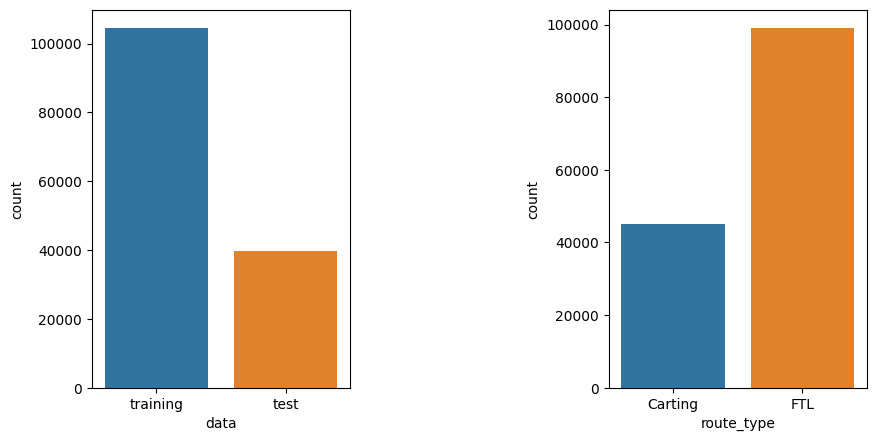

In [ ]:
plt.figure(figsize=(10,2))
plt.subplots_adjust(top=2, wspace=1)

plt.subplot(1,2,1)
sns.countplot(df, x='data')

plt.subplot(1,2,2)
sns.countplot(df, x='route_type')

plt.show()

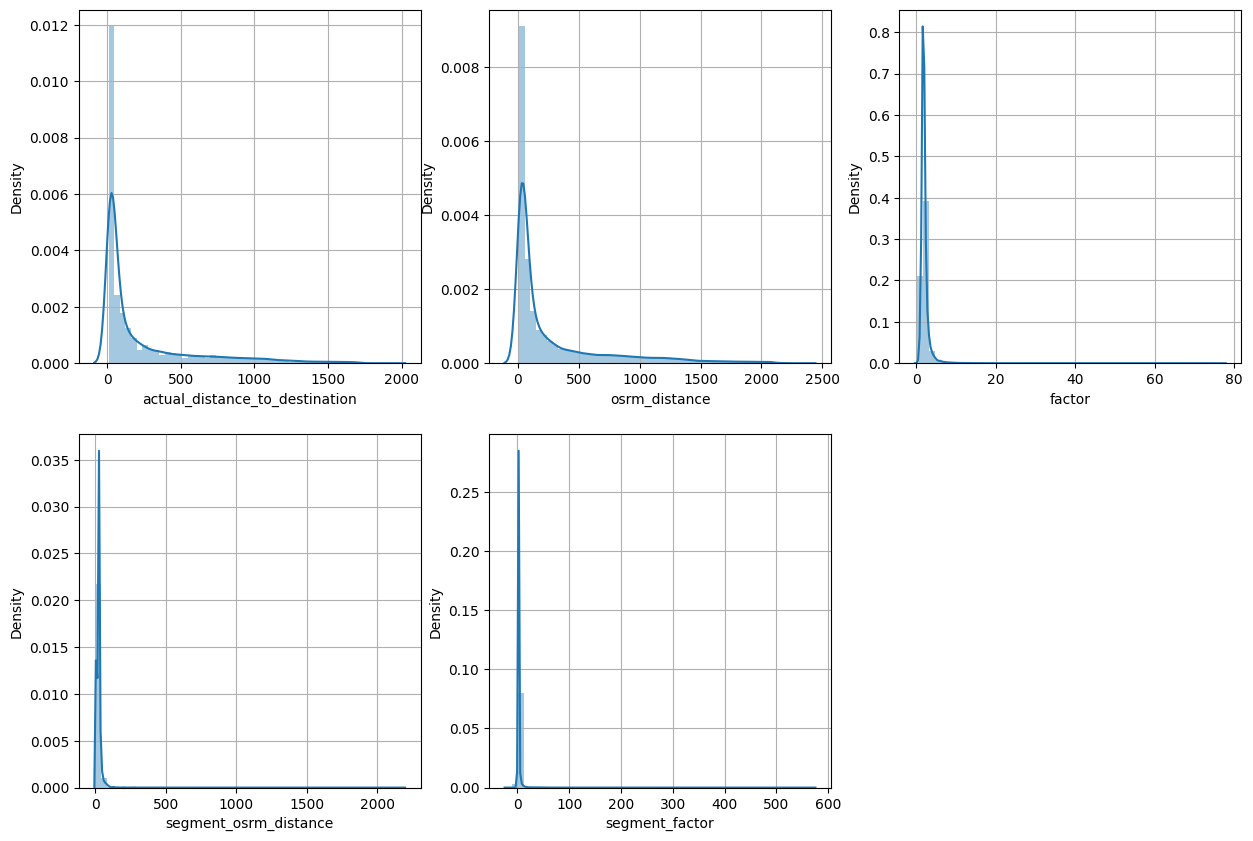

In [ ]:
dd = ["actual_distance_to_destination","osrm_distance","factor","segment_osrm_distance","segment_factor"]

plt.figure(figsize=(15,2))
plt.subplots_adjust(top=4)
x=1
while x<6:
  
  for i in dd:
    plt.subplot(2,3,x)
    sns.distplot(df[i])
    plt.grid()
    x+=1

plt.show()

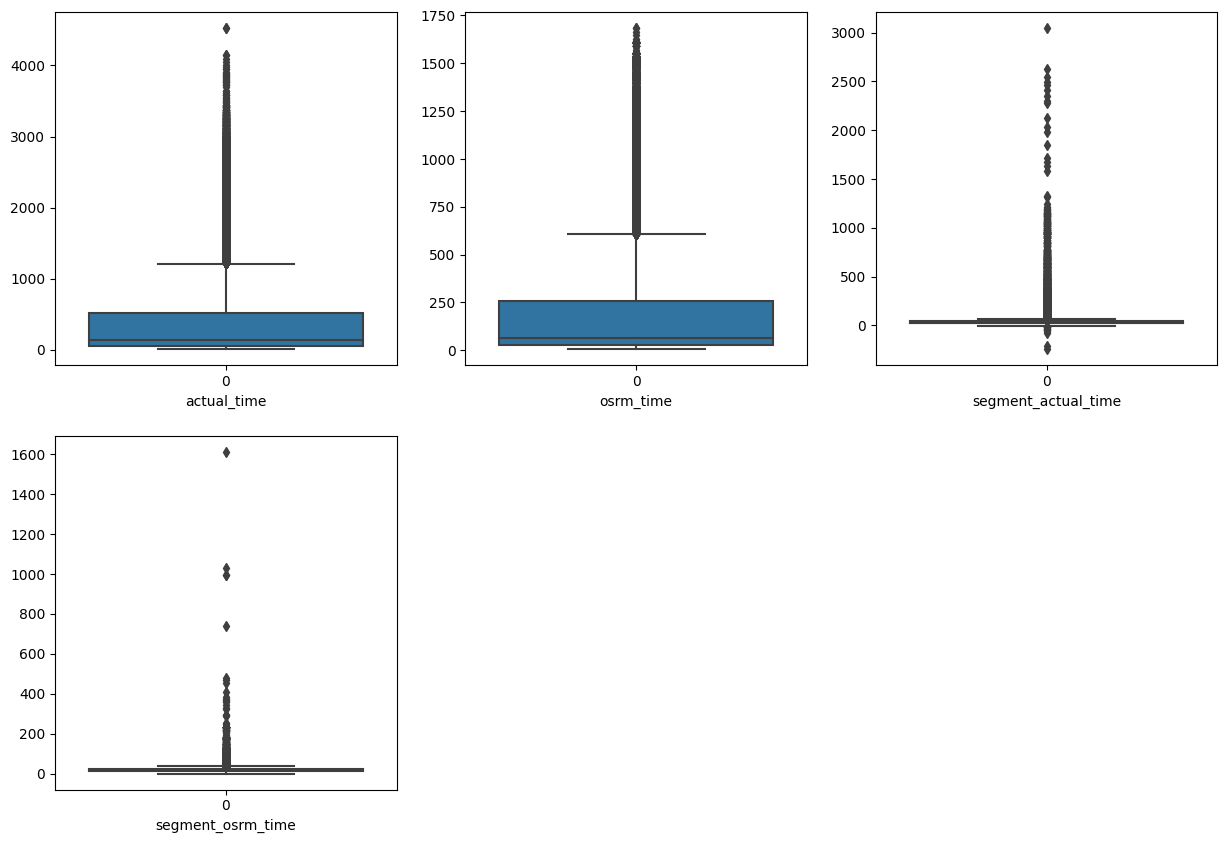

In [ ]:
dd1 = [ "actual_time","osrm_time","segment_actual_time","segment_osrm_time" ]

plt.figure(figsize=(15,2))
plt.subplots_adjust(top=4)
x=1
while x<5:
  
  for i in dd1:
    plt.subplot(2,3,x)
    sns.boxplot(df[i])
    plt.xlabel(i)
    x+=1

plt.show()

<Axes: xlabel='actual_distance_to_destination', ylabel='osrm_distance'>

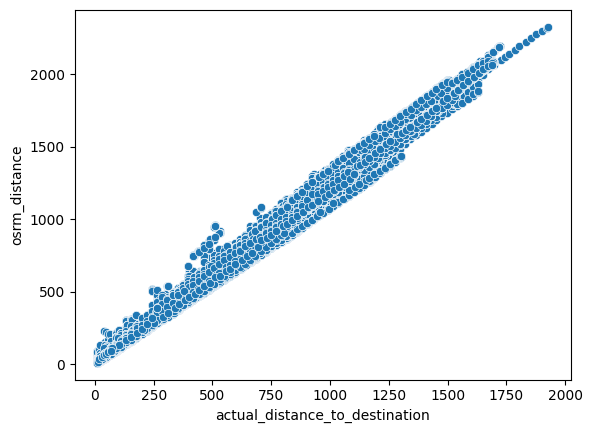

In [ ]:
sns.scatterplot(df, x = "actual_distance_to_destination", y = "osrm_distance")

<Axes: xlabel='actual_time', ylabel='osrm_time'>

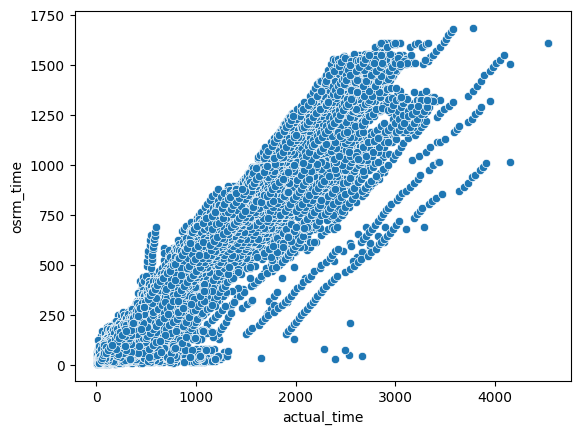

In [ ]:
sns.scatterplot(df, x = "actual_time", y = "osrm_time")

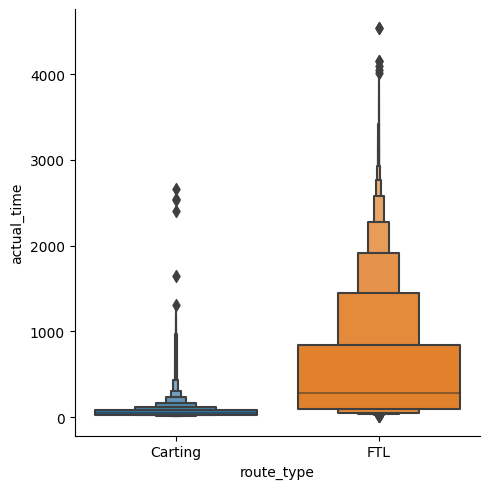

In [ ]:
sns.catplot(df, x= 'route_type', y ='actual_time', kind='boxen' )

In [ ]:
sns.pairplot(df)

<Axes: >

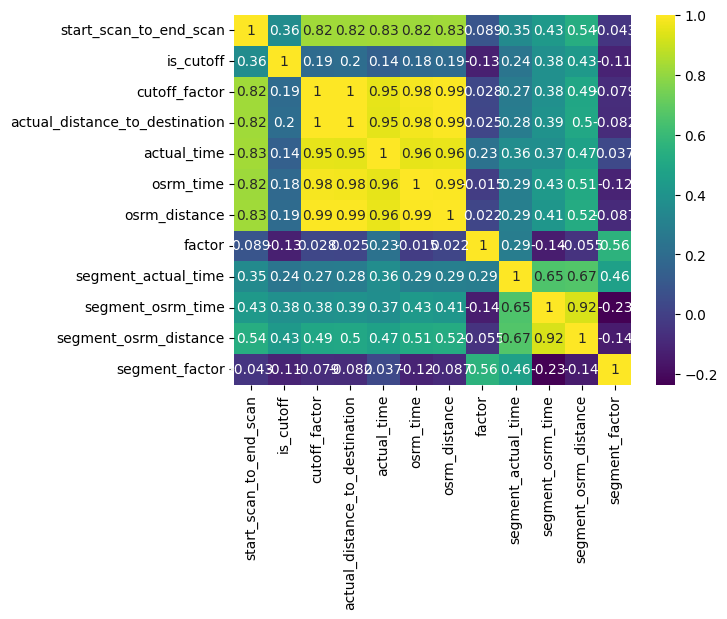

In [ ]:
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='viridis')

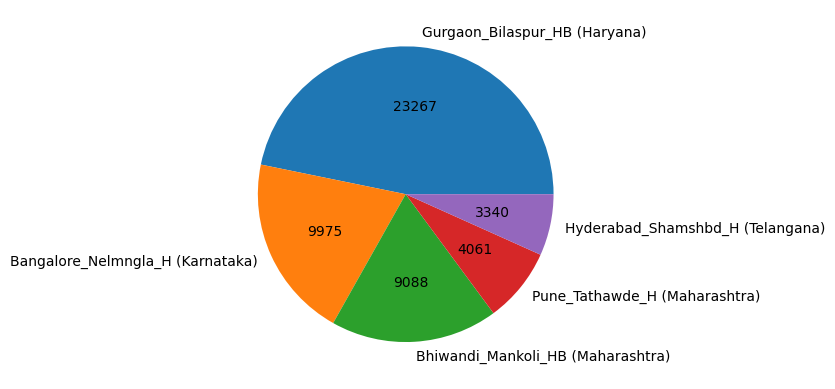

In [ ]:
values = df['source_name'].value_counts().head()
df['source_name'].value_counts().head().plot(kind='pie', label="", autopct= lambda x: '{:.0f}'.format(x*values.sum()/100))
plt.show()

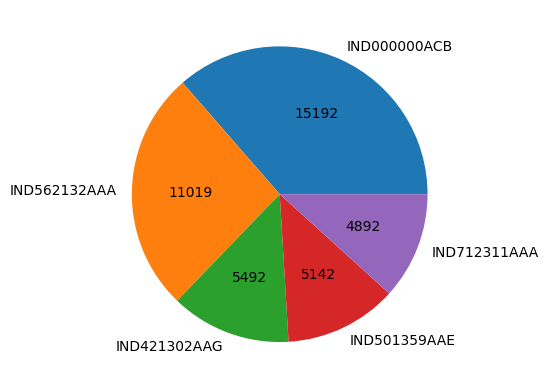

In [ ]:
values1 = df['destination_center'].value_counts().head()
df['destination_center'].value_counts().head().plot(kind='pie', label="", autopct= lambda x: '{:.0f}'.format(x*values1.sum()/100))
plt.show()

**Insights based on EDA**

**1)Comments on range of attributes, outliers of various attributes**

Minimum Actual distance is 9 while max is 1927.4

Minimum time take is 9 where as maximum time taken is 4532

There are 1497 unique route_schedule_uuid

There are 1496 unique source center and 1466 unique destination center

Distance (be it actual or osrm), time(actual or osrm) has lots of outliers

Time taken for Carting also has outliers


**2) Comments on the distribution of the variables and relationship between them**

Distance, time are very much related (between actual and osrm) which suggest less deviation from standard time

Segment time and distance are also very much related (less deviation from predicted time)



**3) Comments for each univariate and bivariate plot**

In terms of data available, count of data under "Training" is more than count of data under "test" 

FTL Services are more availed than carting

Distances be it actual or osrm are very right skewed

Gurgaon Bilaspur has been maximum number of source

IND000000ACB is mostly the destination or hub, conclusion to which we will arrive later after merging few columns

# Feature Creation (10 Points)

In [ ]:
## Destination Name: Split and extract features out of destination. City-place-code (State)

df["destination_name"].value_counts()

Gurgaon_Bilaspur_HB (Haryana)        15192
Bangalore_Nelmngla_H (Karnataka)     11019
Bhiwandi_Mankoli_HB (Maharashtra)     5492
Hyderabad_Shamshbd_H (Telangana)      5142
Kolkata_Dankuni_HB (West Bengal)      4892
                                     ...  
Durg_Bhilai_DC (Chhattisgarh)            1
Bhadohi_Rajpura_D (Uttar Pradesh)        1
Vijayawada (Andhra Pradesh)              1
Daman_DC (Daman & Diu)                   1
Berhampur_Chatrpr_DC (Orissa)            1
Name: destination_name, Length: 1466, dtype: int64

In [ ]:
df["source_name"].value_counts()

Gurgaon_Bilaspur_HB (Haryana)            23267
Bangalore_Nelmngla_H (Karnataka)          9975
Bhiwandi_Mankoli_HB (Maharashtra)         9088
Pune_Tathawde_H (Maharashtra)             4061
Hyderabad_Shamshbd_H (Telangana)          3340
                                         ...  
Badkulla_Central_DPP_1 (West Bengal)         1
Mahasamund_RajpurRD_D (Chhattisgarh)         1
Tiruchi_Samyaprm_D (Tamil Nadu)              1
Islampure_Central_DPP_2 (West Bengal)        1
Bhadra_GMndiDPP_D (Rajasthan)                1
Name: source_name, Length: 1496, dtype: int64

In [ ]:
## Let us try to break the sting in destination name

def to_state(x):
  state = x.split(" (")[1] ## Destination/Source name will be splitted like ["Gurgaon_Bilaspur_HB","Haryana)" ], index[1] will hold state value as "Haryana)"
  return state[:-1]  ## Removing ")" from Haryana using indexing 

def to_city(x):
  almost_city = x.split(" (")[0] ## We will get "Gurgaon_Bilaspur_HB", we need to split more by "_"
  city = almost_city.split("_")[0]
  return city

def to_place(x):
  almost_place = x.split(" (")[0]
  if len(almost_place.split("_"))>2:
    place=almost_place.split("_")[1]
  if len(almost_place.split("_"))<=2:
    place = almost_place.split("_")[0]
  return place

def to_code(x):
  almost_code = x.split(" (")[0]

  if len(almost_code.split("_"))==2:
    return almost_code.split("_")[1]
  if len(almost_code.split("_"))==3:
    return almost_code.split("_")[2]
  if len(almost_code.split("_"))>3:
    y = almost_code.split("_")
    z = "-".join([y[2],y[3]])
    return z


In [ ]:
df['destination_state'] = df['destination_name'].apply(lambda x: to_state(x))
df['destination_city']  = df['destination_name'].apply(lambda x: to_city(x))
df['destination_place'] = df['destination_name'].apply(lambda x: to_place(x))
df['destination_code']  = df['destination_name'].apply(lambda x: to_code(x))

In [ ]:
df['source_state'] = df['source_name'].apply(lambda x: to_state(x))
df['source_city']  = df['source_name'].apply(lambda x: to_city(x))
df['source_place'] = df['source_name'].apply(lambda x: to_place(x))
df['source_code']  = df['source_name'].apply(lambda x: to_code(x))

In [ ]:
df['trip_year'] = df['trip_creation_time'].dt.year
df['trip_month'] = df['trip_creation_time'].dt.month
df['trip_hour'] = df['trip_creation_time'].dt.hour
df['trip_day'] = df['trip_creation_time'].dt.day
df['trip_week'] = df['trip_creation_time'].dt.isocalendar().week
df['trip_dayofweek'] = df['trip_creation_time'].dt.dayofweek

# Merging of rows and aggregation of fields (10 Points)

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,VUNagar,DC,2018,9,2,20,38,3
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,VUNagar,DC,2018,9,2,20,38,3
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,VUNagar,DC,2018,9,2,20,38,3
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,VUNagar,DC,2018,9,2,20,38,3
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,VUNagar,DC,2018,9,2,20,38,3


In [ ]:
## We can see how one trip id has several data (It references the hub points it visits before reaching a warehouse or a destination)
df[df['trip_uuid'] == "trip-153741093647649320"]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,VUNagar,DC,2018,9,2,20,38,3
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,VUNagar,DC,2018,9,2,20,38,3
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,VUNagar,DC,2018,9,2,20,38,3
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,VUNagar,DC,2018,9,2,20,38,3
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,VUNagar,DC,2018,9,2,20,38,3
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,Gujarat,Khambhat,MotvdDPP,D,2018,9,2,20,38,3
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,Gujarat,Khambhat,MotvdDPP,D,2018,9,2,20,38,3
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,Gujarat,Khambhat,MotvdDPP,D,2018,9,2,20,38,3
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,Gujarat,Khambhat,MotvdDPP,D,2018,9,2,20,38,3
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,Gujarat,Khambhat,MotvdDPP,D,2018,9,2,20,38,3


In [ ]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()

## Lets see how the new columns are created with running sum/cumulative sum
df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


In [ ]:
## Let us create a dictionary, so we could apply aggregation on the data using the dictionary groupby segment key

create_segment_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

    'destination_state' : 'first',
    'destination_city' : 'first',
    'destination_place' : 'first',
    'destination_code' :'first',

    'source_state': 'first',
    'source_city' : 'first',
    'source_place' : 'first',
    'source_code' : 'first',

    'trip_year': 'first',
    'trip_month': 'first',
    'trip_hour' : 'first',
    'trip_day': 'first',
    'trip_week': 'first',
    'trip_dayofweek': 'first'



    
}

In [ ]:
ref_data = df.groupby('segment_key').agg(create_segment_dict).reset_index()

In [ ]:
## Please note :- I have more refined the data removing unknown columsn and since we are taking into consideration segment cumulative time sum, I have removed
## columens which had segment actual time
ref_data


,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,Uttar Pradesh,Kanpur,Central,H-6,2018,9,0,12,37,2
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,Madhya Pradesh,Bhopal,Trnsport,H,2018,9,0,12,37,2
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,Karnataka,Doddablpur,ChikaDPP,D,2018,9,0,12,37,2
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,Karnataka,Tumkur,Veersagr,I,2018,9,0,12,37,2
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,Haryana,Gurgaon,Bilaspur,HB,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),...,Tamil Nadu,Tirchchndr,Shnmgprm,D,2018,10,23,3,40,2
26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),...,Tamil Nadu,Peikulam,SriVnktpm,D,2018,10,23,3,40,2
26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),...,Tamil Nadu,Eral,Busstand,D,2018,10,23,3,40,2
26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),...,Karnataka,Sandur,WrdN1DPP,D,2018,10,23,3,40,2


In [ ]:
ref_data = ref_data.sort_values('trip_uuid', ascending=True)

In [ ]:
ref_data.head() 

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,Uttar Pradesh,Kanpur,Central,H-6,2018,9,0,12,37,2
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,Madhya Pradesh,Bhopal,Trnsport,H,2018,9,0,12,37,2
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,Karnataka,Doddablpur,ChikaDPP,D,2018,9,0,12,37,2
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,Karnataka,Tumkur,Veersagr,I,2018,9,0,12,37,2
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,Haryana,Gurgaon,Bilaspur,HB,2018,9,0,12,37,2


In [ ]:
ref_data[ref_data['trip_uuid']=="trip-153741093647649320"] ## Just to check if we have managed to successfully groupby and implement aggregation

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
10370,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,Gujarat,Anand,VUNagar,DC,2018,9,2,20,38,3
10371,trip-153741093647649320IND388620AABIND388320AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),...,Gujarat,Khambhat,MotvdDPP,D,2018,9,2,20,38,3


In [ ]:
ref_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26222 entries, 0 to 26221
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26222 non-null  object        
 1   data                            26222 non-null  object        
 2   trip_creation_time              26222 non-null  datetime64[ns]
 3   route_schedule_uuid             26222 non-null  object        
 4   route_type                      26222 non-null  object        
 5   trip_uuid                       26222 non-null  object        
 6   source_center                   26222 non-null  object        
 7   source_name                     26222 non-null  object        
 8   destination_center              26222 non-null  object        
 9   destination_name                26222 non-null  object        
 10  od_start_time                   26222 non-null  datetime64[ns]
 11  od

In [ ]:
## Trying to add both trip uuid to a single one
new_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'od_start_time' : 'first'
    ''
    
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'start_scan_to_end_scan' : 'sum',
    
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

    'destination_state' : 'last',
    'destination_city' : 'last',
    'destination_place' : 'last',
    'destination_code' :'last',

    'source_state': 'first',
    'source_city' : 'first',
    'source_place' : 'first',
    'source_code' : 'first',

    'trip_year': 'last',
    'trip_month': 'last',
    'trip_hour' : 'last',
    'trip_day': 'last',
    'trip_week': 'last',
    'trip_dayofweek': 'last'


    
}

In [ ]:
final_df = ref_data.groupby('trip_uuid').agg(new_dict).reset_index(drop = True)

In [ ]:
final_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,...,Uttar Pradesh,Kanpur,Central,H-6,2018,9,0,12,37,2
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,...,Karnataka,Doddablpur,ChikaDPP,D,2018,9,0,12,37,2
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,...,Haryana,Gurgaon,Bilaspur,HB,2018,9,0,12,37,2
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,...,Maharashtra,Mumbai Hub,Mumbai Hub,None,2018,9,0,12,37,2
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,...,Karnataka,Bellary,Bellary,Dc,2018,9,0,12,37,2


In [ ]:
final_df.shape

(14787, 31)

In [ ]:
final_df[final_df['trip_uuid']=="trip-153741093647649320"] ## Checking if we have suceesfully aggregated

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
5917,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),195.0,...,Gujarat,Anand,VUNagar,DC,2018,9,2,20,38,3


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  object        
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   start_scan_to_end_scan          14787 non-null  float64       
 10  actual_distance_to_destination  14787 non-null  float64       
 11  ac

In [ ]:
## Let us create one last feature where in we calculate the difference in od start time and od end time